<a href="https://colab.research.google.com/github/Abhinandan-Dwivedi/Pothole-Dection/blob/main/05pothole_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
from IPython.display import Image, display

In [ ]:
!nvidia-smi

Wed Oct 29 10:16:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

In [ ]:
import ultralytics

In [ ]:
!mkdir {HOME}/datasets

mkdir: cannot create directory ‘/content/datasets’: File exists


In [ ]:
%cd {HOME}/datasets

/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QUWMCW70c1dPy9pc03sQ")
project = rf.workspace("hiteshram").project("object-detection-bounding-box-ftfs5")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Object-Detection-(Bounding-Box)-1 in yolov5pytorch:: 100%|██████████| 800/800 [00:00<00:00, 7554.14it/s]


In [ ]:
!pip install fastapi kaleido python_multipart uvicorn

In [21]:
%cd {HOME}
%cd {dataset.location}

/content
/content/Object-Detection-(Bounding-Box)-1


In [23]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data="/content/Object-Detection-(Bounding-Box)-1/data.yaml" epochs=100 imgsz=640


/content
Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Object-Detection-(Bounding-Box)-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, 

In [24]:
!ls {HOME} /content/runs/detect/train4

/content:
 datasets			      runs	    yolo11n.pt
'Object-Detection-(Bounding-Box)-1'   sample_data   yolov8m.pt

/content/runs/detect/train4:
args.yaml			 labels.jpg	      train_batch2072.jpg
BoxF1_curve.png			 results.csv	      train_batch2.jpg
BoxP_curve.png			 results.png	      val_batch0_labels.jpg
BoxPR_curve.png			 train_batch0.jpg     val_batch0_pred.jpg
BoxR_curve.png			 train_batch1.jpg     weights
confusion_matrix_normalized.png  train_batch2070.jpg
confusion_matrix.png		 train_batch2071.jpg


/content


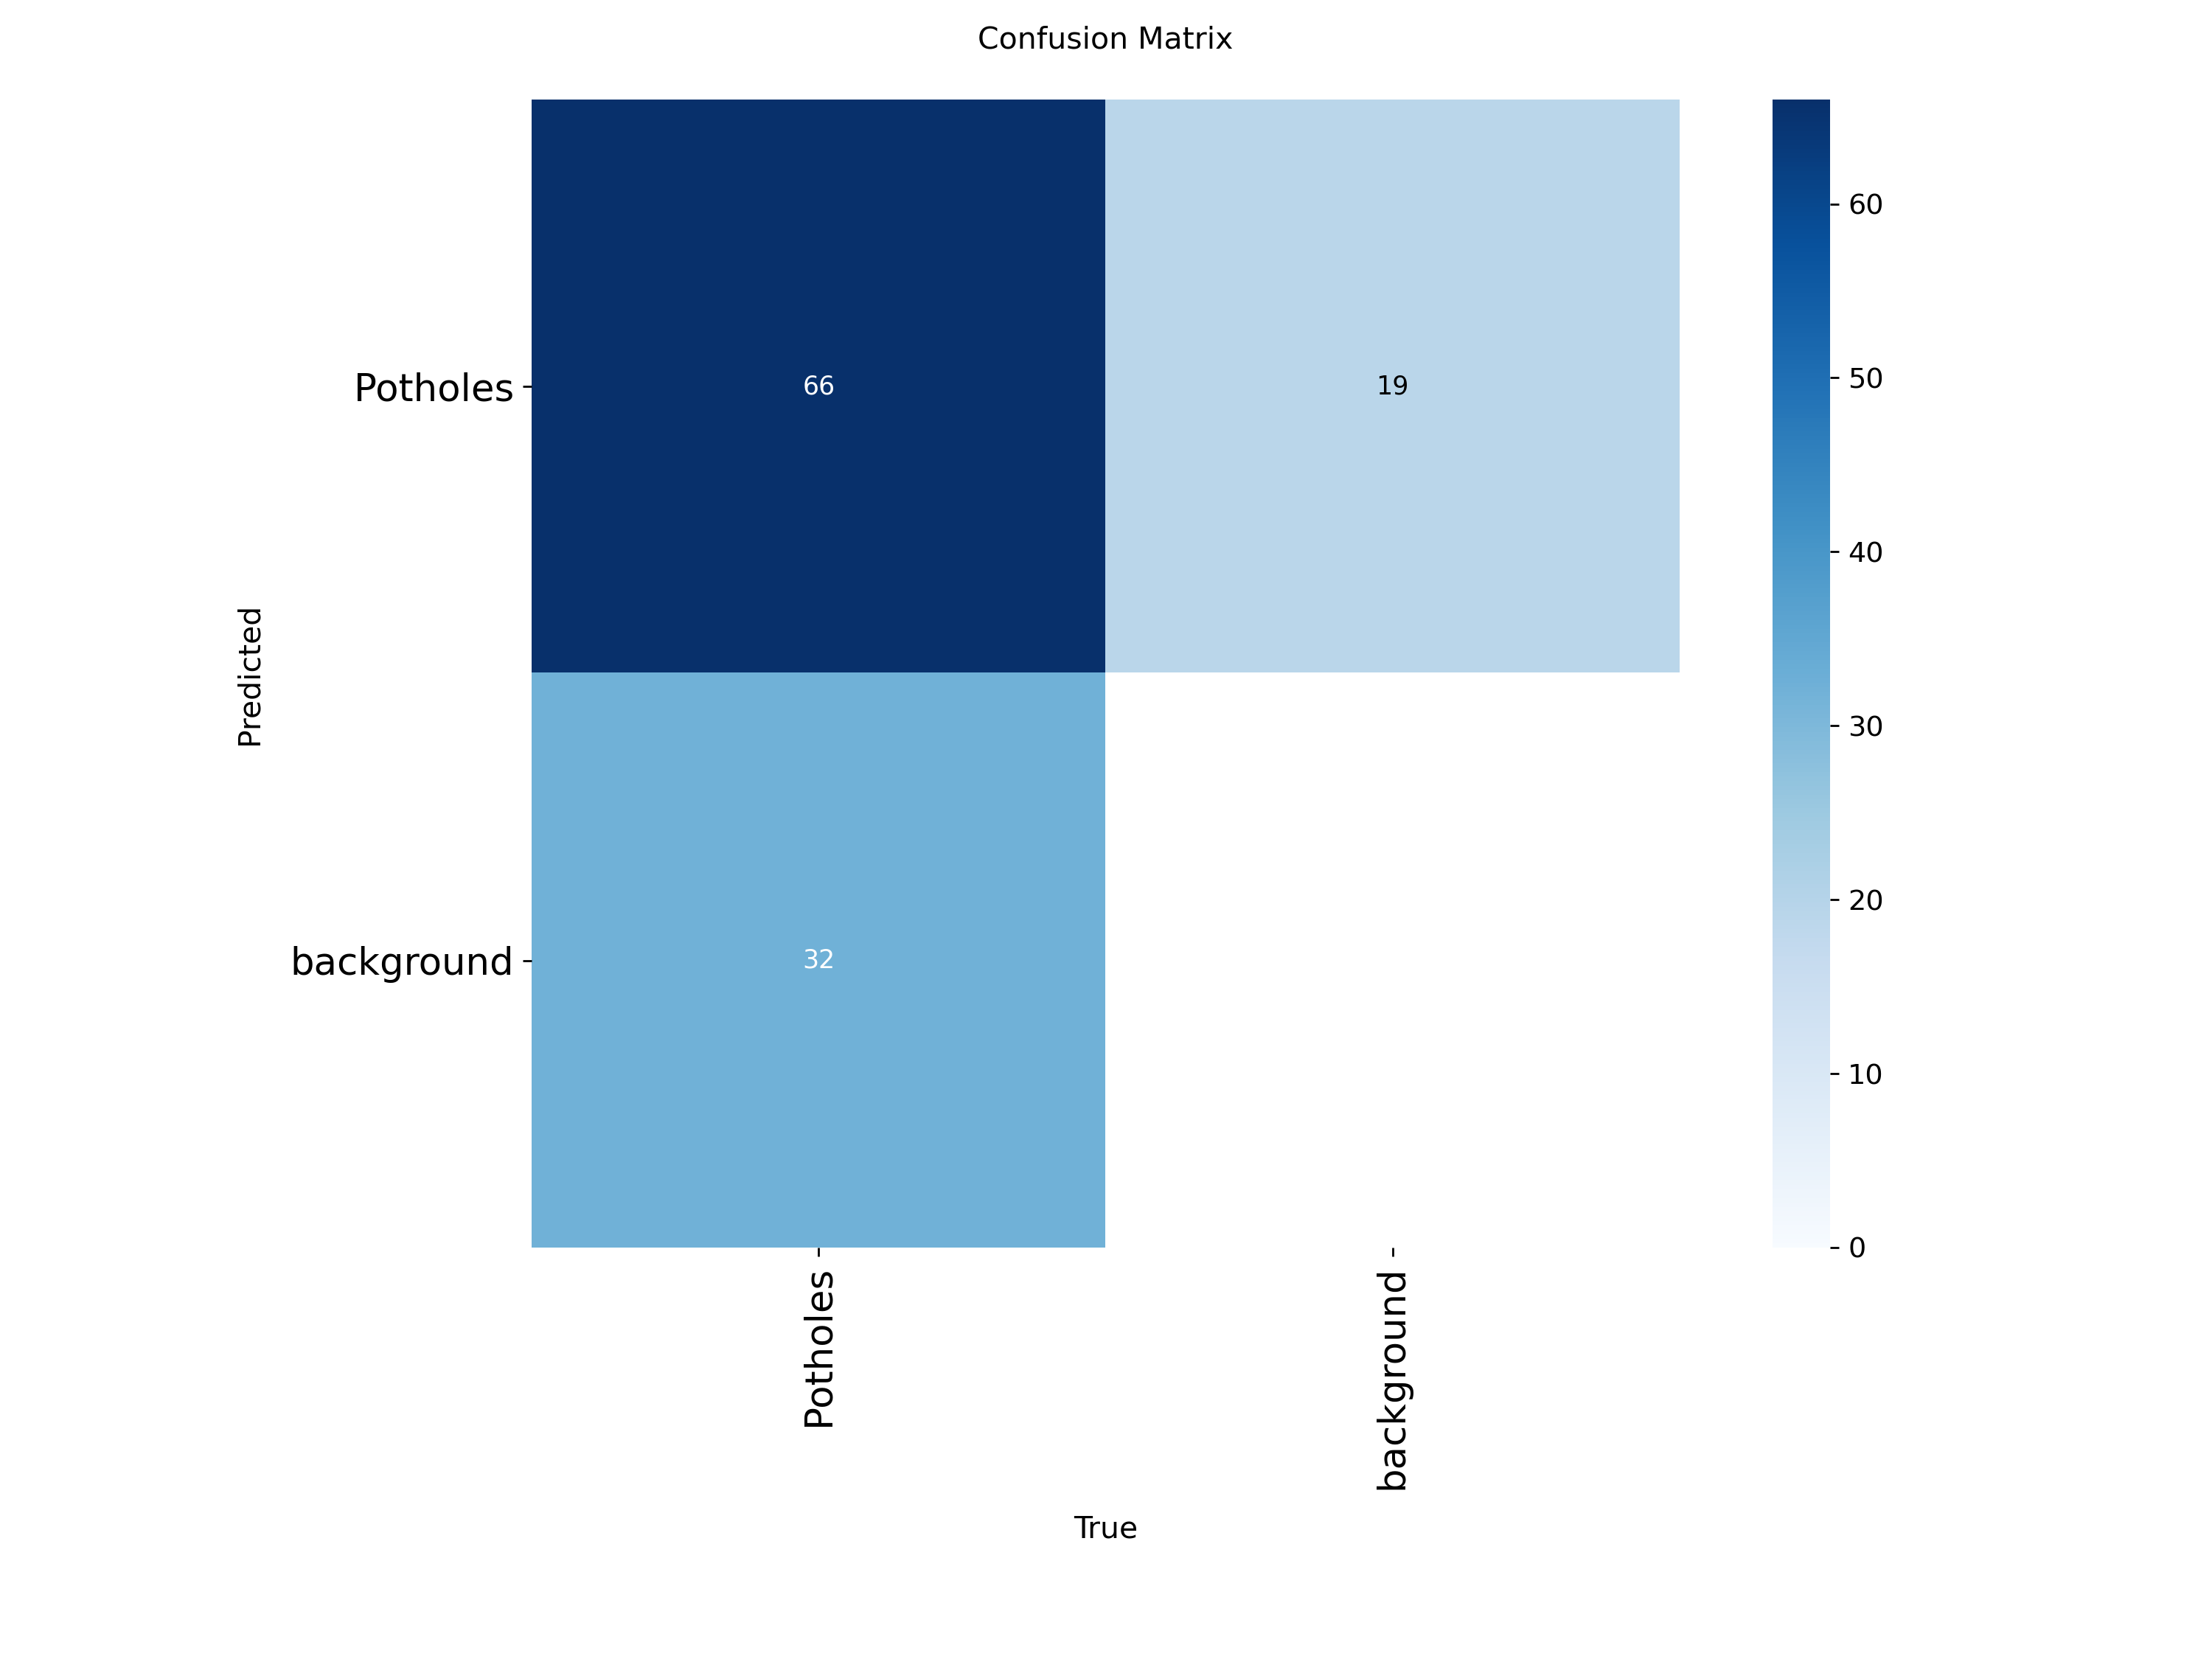

In [25]:
%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train4/confusion_matrix.png', width = 900)

/content


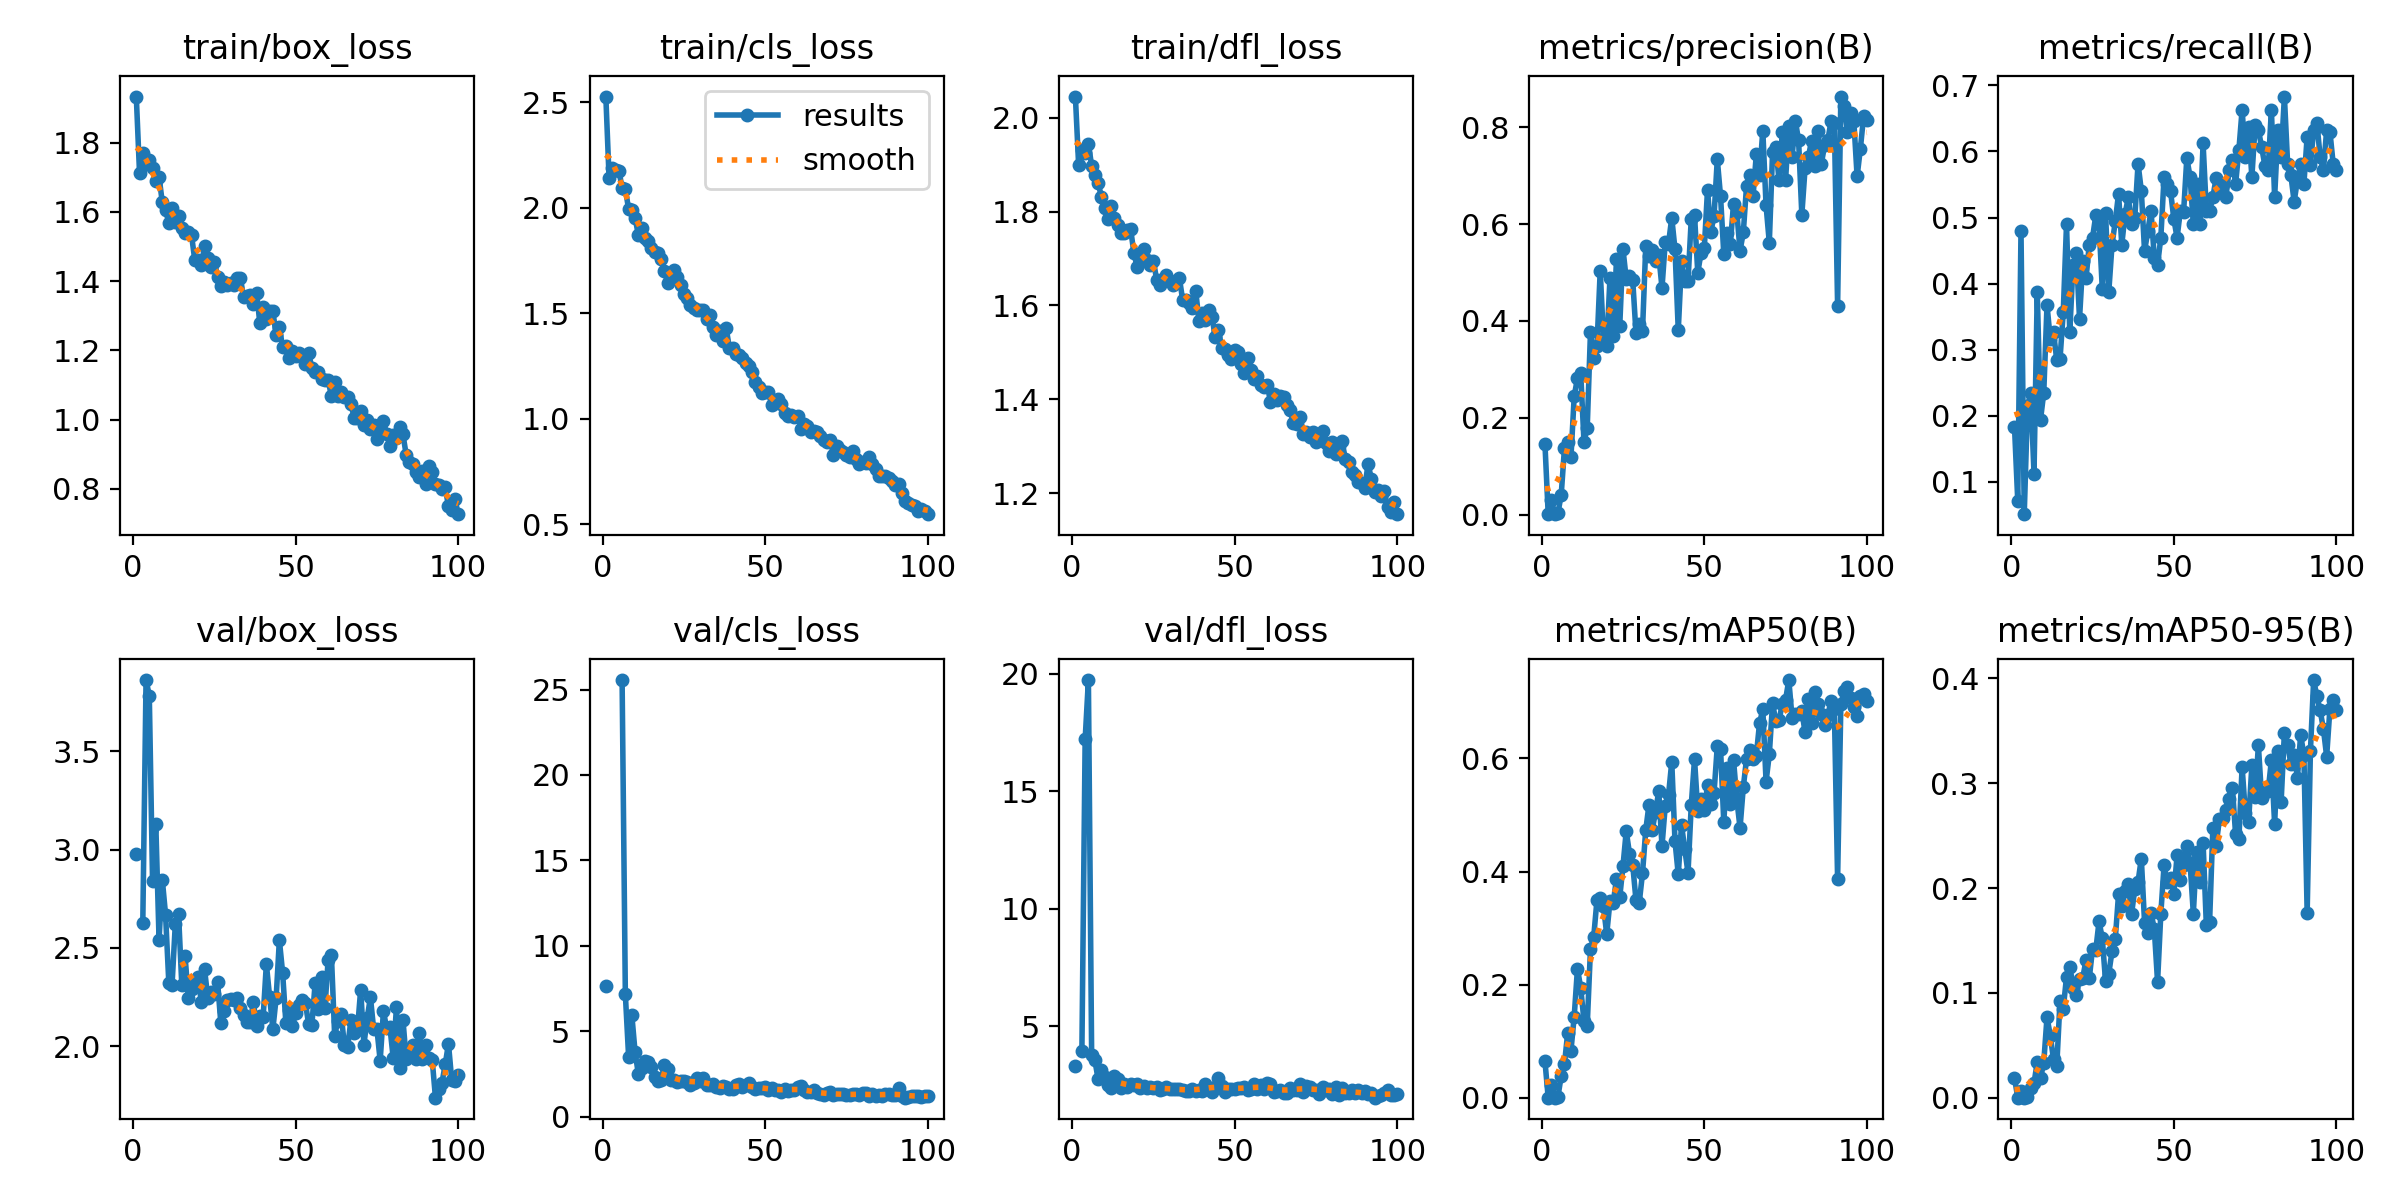

In [26]:
%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train4/results.png', width = 600)

/content


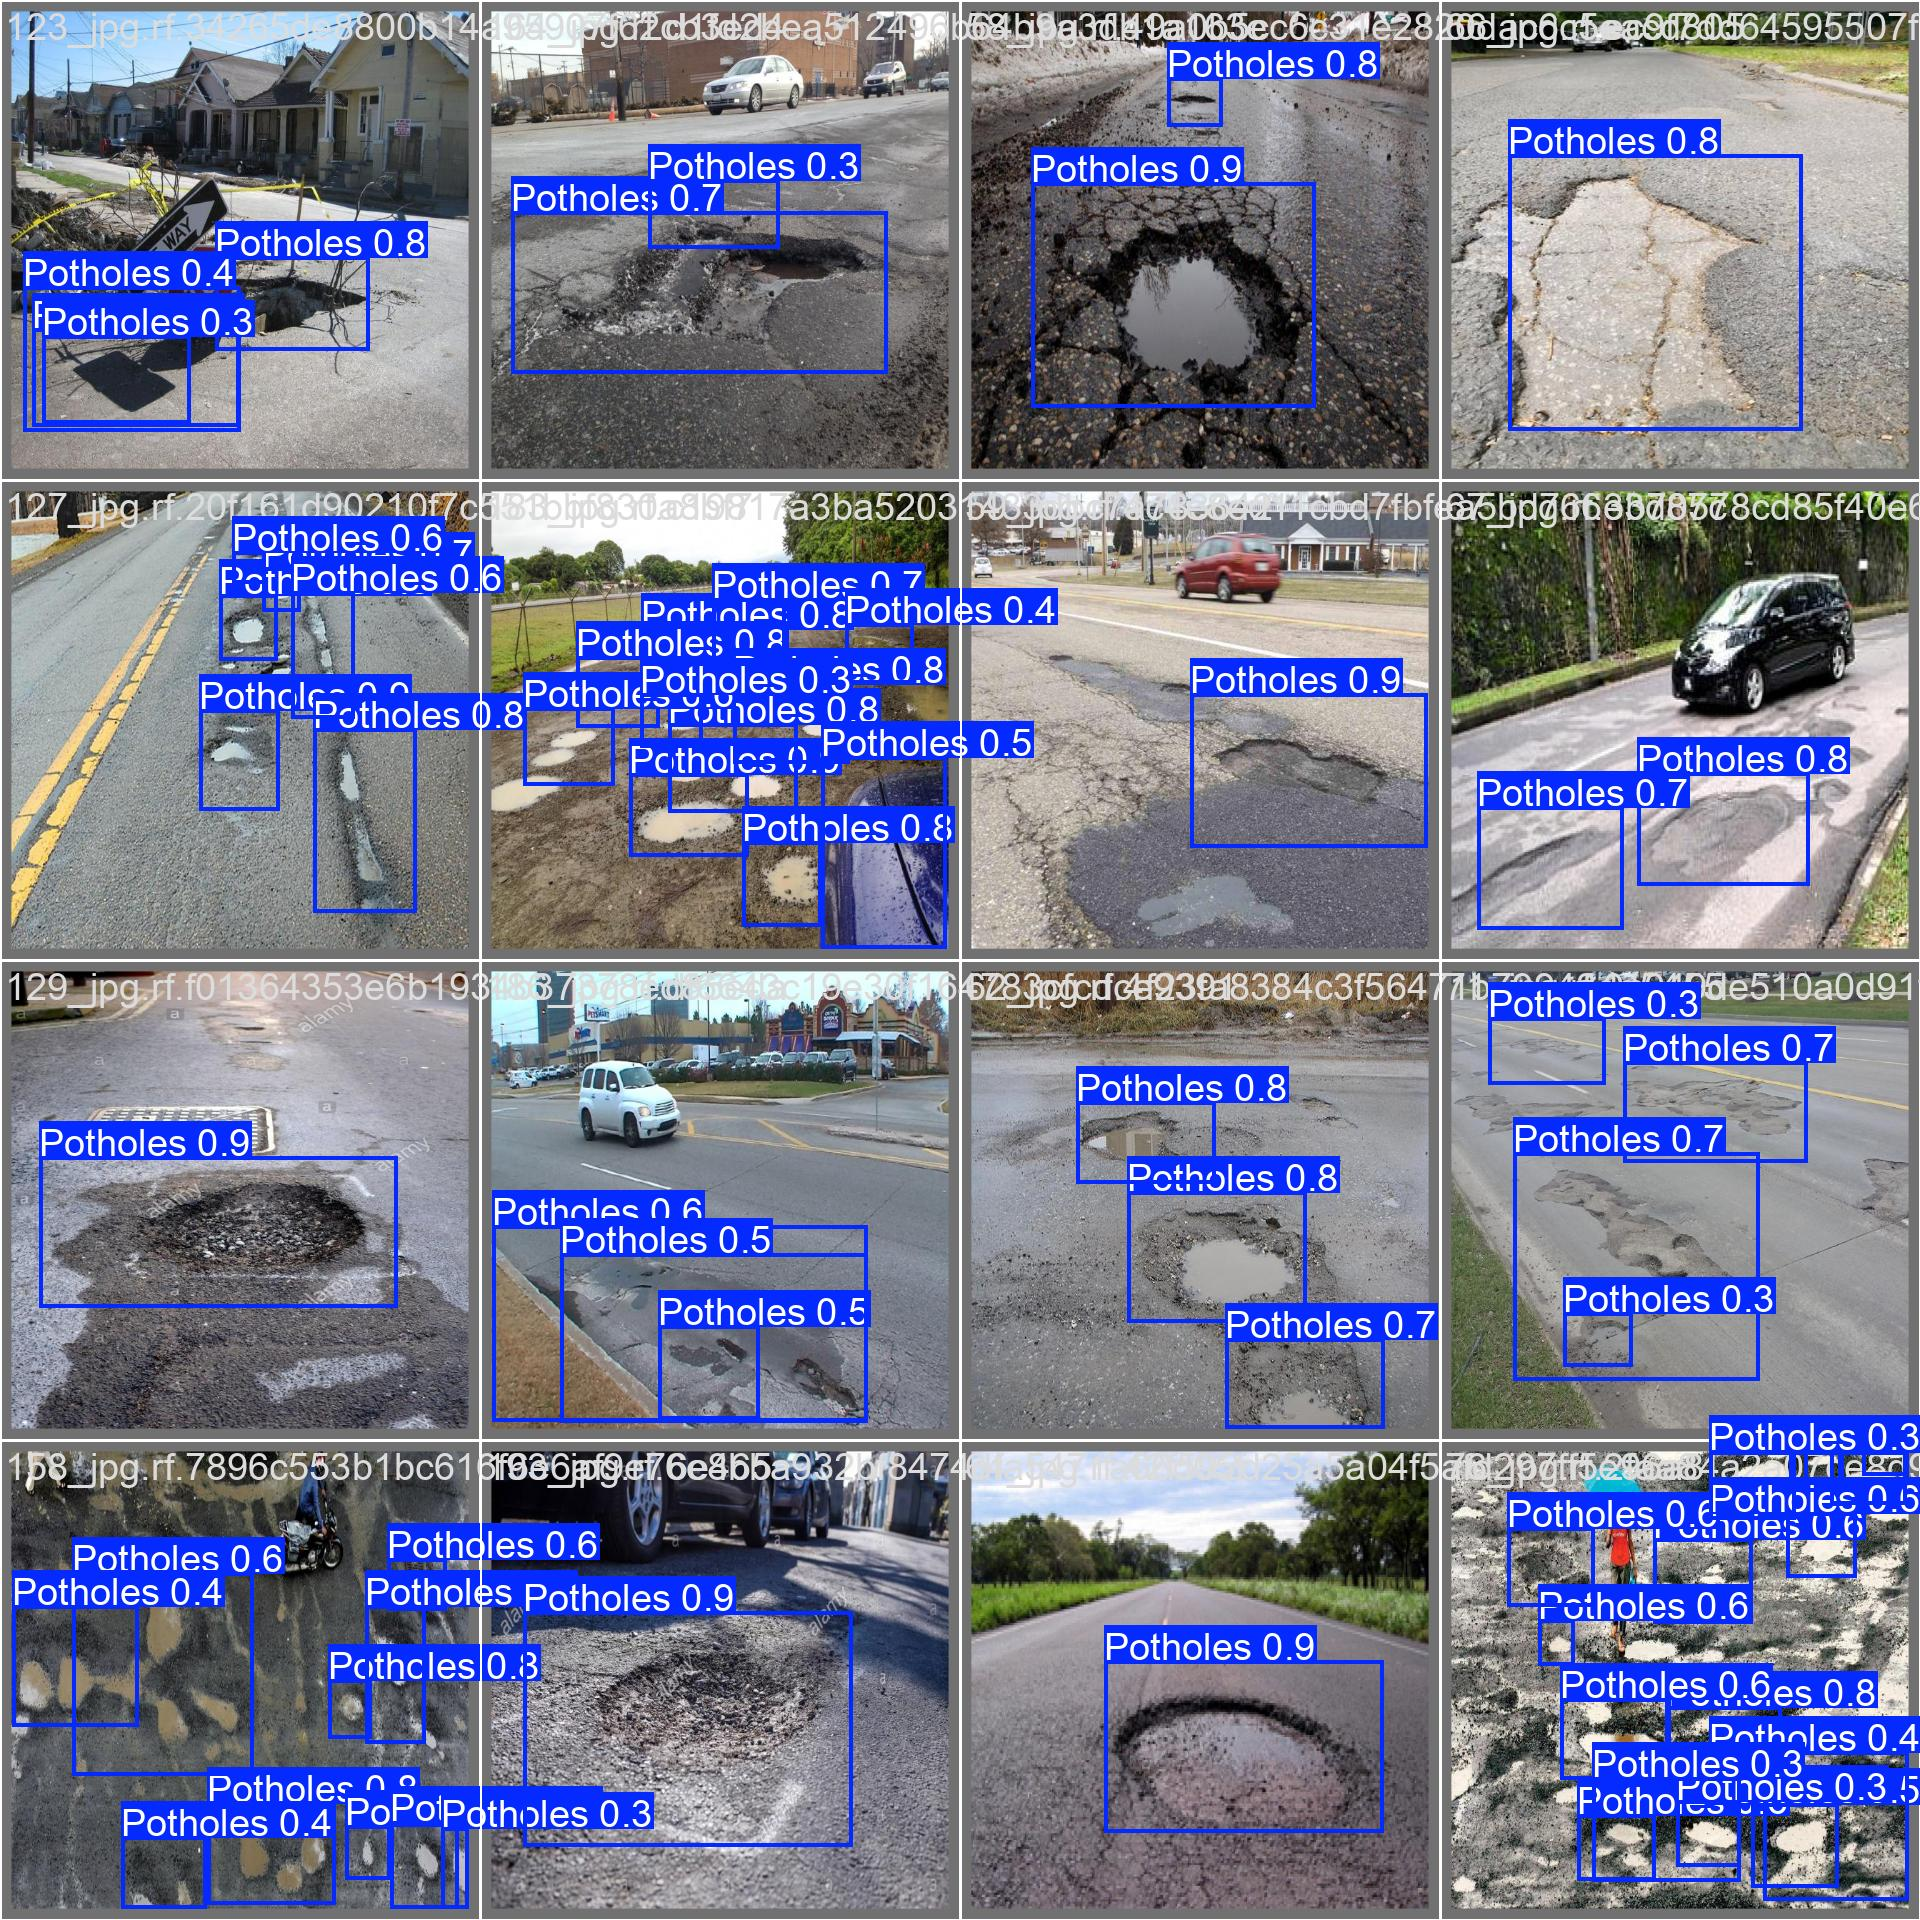

In [27]:
%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width = 600)

In [28]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data="/content/Object-Detection-(Bounding-Box)-1/data.yaml"

/content
Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2200.4±381.4 MB/s, size: 89.2 KB)
val: Scanning /content/Object-Detection-(Bounding-Box)-1/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 20/20 369.5Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 2.3it/s 0.9s
                   all         20         98      0.855      0.633      0.721      0.397
Speed: 4.3ms preprocess, 25.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [29]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source="/content/Object-Detection-(Bounding-Box)-1/test/images"

/content
Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/20 /content/Object-Detection-(Bounding-Box)-1/test/images/106_jpg.rf.12693aed3783446751b93aeb94d8bafe.jpg: 640x640 8 Potholess, 37.0ms
image 2/20 /content/Object-Detection-(Bounding-Box)-1/test/images/111_jpg.rf.91472dc665da666b10d8fa58d88463aa.jpg: 640x640 5 Potholess, 36.9ms
image 3/20 /content/Object-Detection-(Bounding-Box)-1/test/images/131_jpg.rf.f49fe5d93fab29363b8b04f6b89d5330.jpg: 640x640 10 Potholess, 36.9ms
image 4/20 /content/Object-Detection-(Bounding-Box)-1/test/images/142_jpg.rf.ef9f025b2536187f2dbbbdb80bc8bfb1.jpg: 640x640 1 Potholes, 37.0ms
image 5/20 /content/Object-Detection-(Bounding-Box)-1/test/images/150_jpg.rf.7808eb72654e8521bb8b25743c94bbc4.jpg: 640x640 2 Potholess, 29.2ms
image 6/20 /content/Object-Detection-(Bounding-Box)-1/test/images/153_jpg.rf.a71edc2ff4bd81850c0423b23e29caa9.

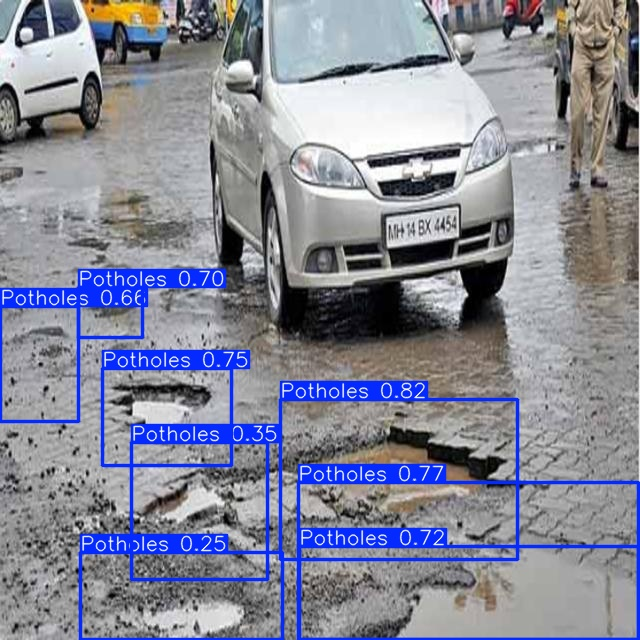

In [31]:
Image('/content/runs/detect/predict/106_jpg.rf.12693aed3783446751b93aeb94d8bafe.jpg')
